# Removing Punctuation and Digits

In [1]:
s = "Hello!! 1984 is great, isn't it? So is 2015!!!"
import string
p = string.punctuation

In [2]:
p

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [3]:
d = string.digits

In [4]:
d

'0123456789'

In [9]:
table = str.maketrans(p, len(p) * " ")

In [10]:
s.translate(table)

'Hello   1984 is great  isn t it  So is 2015   '

In [11]:
table = str.maketrans(d, len(d) * " ")
s.translate(table)

"Hello!!      is great, isn't it? So is     !!!"

# Stemming

In [13]:
import nltk 

In [14]:
stemmer= nltk.PorterStemmer()

In [17]:
lst = ['force', 'forces', 'forcing']
stemmed_lst = [stemmer.stem(word) for word in lst]
stemmed_lst

['forc', 'forc', 'forc']

However, stemming is not a very good practice. Use lemmatization instead

Try using Textacy ~ Dr. Nerur

# Tokenization

In [31]:
import nltk
#read some file in 
f = open("reviews.txt")

In [23]:
#tokenize it using nltk
words = nltk.word_tokenize(f.read())
#word_tokenize separates words just like split(). 
#But for split(), if we have punctuation, it treats punctuation as part of the word. Therefore, we tokenize

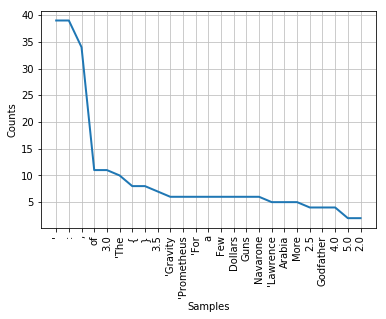

In [24]:
#pass words to nltk.FreqDist
freq = nltk.FreqDist(words)
#plot the top 25 words
freq.plot(25)

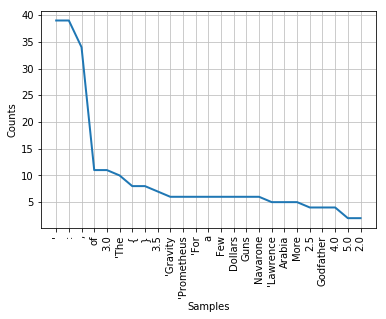

In [25]:
#pass words to nltk.FreqDist
freq = nltk.FreqDist(words)
#plot the top 25 words
freq.plot(25)

In [26]:
f.close()

# Removing Stopwords

In [27]:
import nltk

In [29]:
s = "this is to demonstrate how stopwords can be removed"
words = s.split()
stopwords = nltk.corpus.stopwords.words("english")
words = [w for w in words if w not in stopwords]

In [30]:
words

['demonstrate', 'stopwords', 'removed']

In [4]:
from textblob import TextBlob
s = "It is all a checkerboard of nights and days. Destiny with men for pieces plays"
text = TextBlob(s)

In [5]:
text.words

WordList(['It', 'is', 'all', 'a', 'checkerboard', 'of', 'nights', 'and', 'days', 'Destiny', 'with', 'men', 'for', 'pieces', 'plays'])

In [11]:
lst = text.sentences
lst[0]
len(lst)

2

In [35]:
text.tags

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('all', 'PDT'),
 ('a', 'DT'),
 ('checkerboard', 'NN'),
 ('of', 'IN'),
 ('nights', 'NNS'),
 ('and', 'CC'),
 ('days', 'NNS'),
 ('Destiny', 'NNP'),
 ('with', 'IN'),
 ('men', 'NNS'),
 ('for', 'IN'),
 ('pieces', 'NNS'),
 ('plays', 'NNS')]

In [36]:
text.noun_phrases

WordList(['destiny', 'pieces plays'])

In [39]:
s= "this is a great class"
text = TextBlob(s)
text.sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [40]:
s = "People say I am not funny"
text = TextBlob(s)
text.sentiment

Sentiment(polarity=-0.125, subjectivity=1.0)

# CountVectorizer

CountVectorizer is not very useful; TfidVectorizer is used instead. There's another one called HashingVectorizer

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
#mock data for demo purposes
doc1 = "the moving finger writes and having writ moves on"
doc2 = "gold finger or golden finger; the question is moot"
doc3 = "he is a finger spinner and can write with it too"
doc4 = "the valiant never taste of death but once, or so they say"
doc5 = "knights are valiant and never afraid of death"
docs = [doc1, doc2, doc3, doc4, doc5]
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(docs) #Here, matrix is a Document Term Matrix (DTM)
print(vectorizer.get_feature_names()) #The features are our words
print(matrix.toarray()) #Output: 1 indicates that the word appears in the first document; 
                        #0 indicates that the word does not appear in the first document; Likewise for all other documents
                        #toarray() converts this to a dense format / use todense()

['afraid', 'and', 'are', 'but', 'can', 'death', 'finger', 'gold', 'golden', 'having', 'he', 'is', 'it', 'knights', 'moot', 'moves', 'moving', 'never', 'of', 'on', 'once', 'or', 'question', 'say', 'so', 'spinner', 'taste', 'the', 'they', 'too', 'valiant', 'with', 'writ', 'write', 'writes']
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 2 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0]
 [1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]


In [3]:
print(vectorizer.vocabulary_) #This is the BoW -> (word:index) format

{'the': 27, 'moving': 16, 'finger': 6, 'writes': 34, 'and': 1, 'having': 9, 'writ': 32, 'moves': 15, 'on': 19, 'gold': 7, 'or': 21, 'golden': 8, 'question': 22, 'is': 11, 'moot': 14, 'he': 10, 'spinner': 25, 'can': 4, 'write': 33, 'with': 31, 'it': 12, 'too': 29, 'valiant': 30, 'never': 17, 'taste': 26, 'of': 18, 'death': 5, 'but': 3, 'once': 20, 'so': 24, 'they': 28, 'say': 23, 'knights': 13, 'are': 2, 'afraid': 0}


matrix (DTM) is a sparse matrix. This creates a Bag of Words model: Enumerates it into an: 1. index, 2. word

Interpretation: 0 indicates the word does not appear in the first doc; 1 indicates the word appears once, 2 indicates it appears twice and so on.

# TfidfVectorizer

In [46]:
##tf- idf

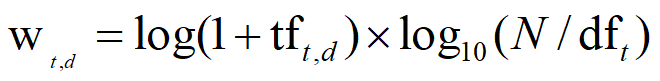

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
#mock data for demo purposes
doc1 = "the moving finger writes and having writ moves on"
doc2 = "gold finger or golden finger; the question is moot"
doc3 = "he is a finger spinner and can write with it too"
doc4 = "the valiant never taste of death but once, or so they say"
doc5 = "knights are valiant and never afraid of death"
docs = [doc1, doc2, doc3, doc4, doc5]
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(docs)
print(vectorizer.get_feature_names())
print(matrix.toarray()) 


['afraid', 'and', 'are', 'but', 'can', 'death', 'finger', 'gold', 'golden', 'having', 'he', 'is', 'it', 'knights', 'moot', 'moves', 'moving', 'never', 'of', 'on', 'once', 'or', 'question', 'say', 'so', 'spinner', 'taste', 'the', 'they', 'too', 'valiant', 'with', 'writ', 'write', 'writes']
[[ 0.          0.24710183  0.          0.          0.          0.
   0.24710183  0.          0.          0.36896749  0.          0.          0.
   0.          0.          0.36896749  0.36896749  0.          0.
   0.36896749  0.          0.          0.          0.          0.          0.
   0.          0.24710183  0.          0.          0.          0.
   0.36896749  0.          0.36896749]
 [ 0.          0.          0.          0.          0.          0.
   0.48764691  0.36407229  0.36407229  0.          0.          0.29373123
   0.          0.          0.36407229  0.          0.          0.          0.
   0.          0.          0.29373123  0.36407229  0.          0.          0.
   0.          0.2438

# Converting to Dense Format

In [47]:
vectorizer = TfidfVectorizer()
sparse_matrix = vectorizer.fit_transform(docs)
#convert sparse matrix to dense
dense_matrix = sparse_matrix.todense()
#transpose to get document-to-term matrix
tdm = dense_matrix.transpose()
print(tdm)

[[ 0.          0.          0.          0.          0.40648465]
 [ 0.24710183  0.          0.2290641   0.          0.27222751]
 [ 0.          0.          0.          0.          0.40648465]
 [ 0.          0.          0.          0.32102945  0.        ]
 [ 0.          0.          0.34203392  0.          0.        ]
 [ 0.          0.          0.          0.25900454  0.32794926]
 [ 0.24710183  0.48764691  0.2290641   0.          0.        ]
 [ 0.          0.36407229  0.          0.          0.        ]
 [ 0.          0.36407229  0.          0.          0.        ]
 [ 0.36896749  0.          0.          0.          0.        ]
 [ 0.          0.          0.34203392  0.          0.        ]
 [ 0.          0.29373123  0.27595081  0.          0.        ]
 [ 0.          0.          0.34203392  0.          0.        ]
 [ 0.          0.          0.          0.          0.40648465]
 [ 0.          0.36407229  0.          0.          0.        ]
 [ 0.36896749  0.          0.          0.          0.  